<h1><b>Sales Prediction Using Python</b></h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from pandas.plotting import andrews_curves
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
adv=pd.read_csv(r"C:\Users\MSI\Downloads\Advertising.csv")
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
adv.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [19]:
adv

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [20]:
adv.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [22]:
adv.size

1000

In [23]:
adv.shape

(200, 5)

In [30]:
adv.groupby("TV").size()

TV
0.7      1
4.1      1
5.4      1
7.3      1
7.8      1
        ..
289.7    1
290.7    1
292.9    1
293.6    1
296.4    1
Length: 190, dtype: int64

In [31]:
adv.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [35]:
adv.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [43]:
print(adv['TV'].max())
print(adv['Radio'].max())
print(adv['Newspaper'].max())
print(adv['Sales'].max())

296.4
49.6
114.0
27.0


<h3><b>Data Visualization</b></h3>

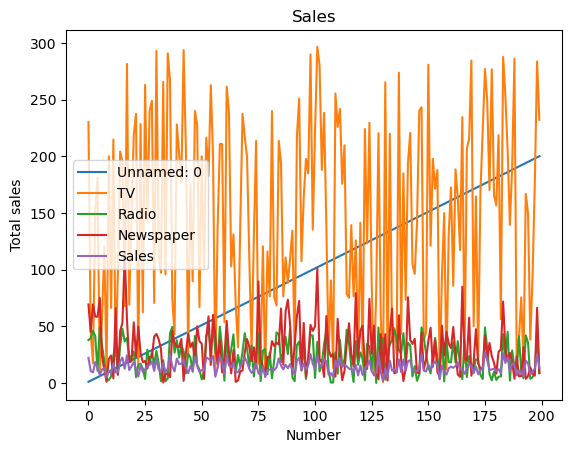

In [60]:
plt.plot(adv)
plt.title("Sales")
plt.xlabel("Number")
plt.ylabel("Total sales")
plt.legend(adv)

<BarContainer object of 200 artists>

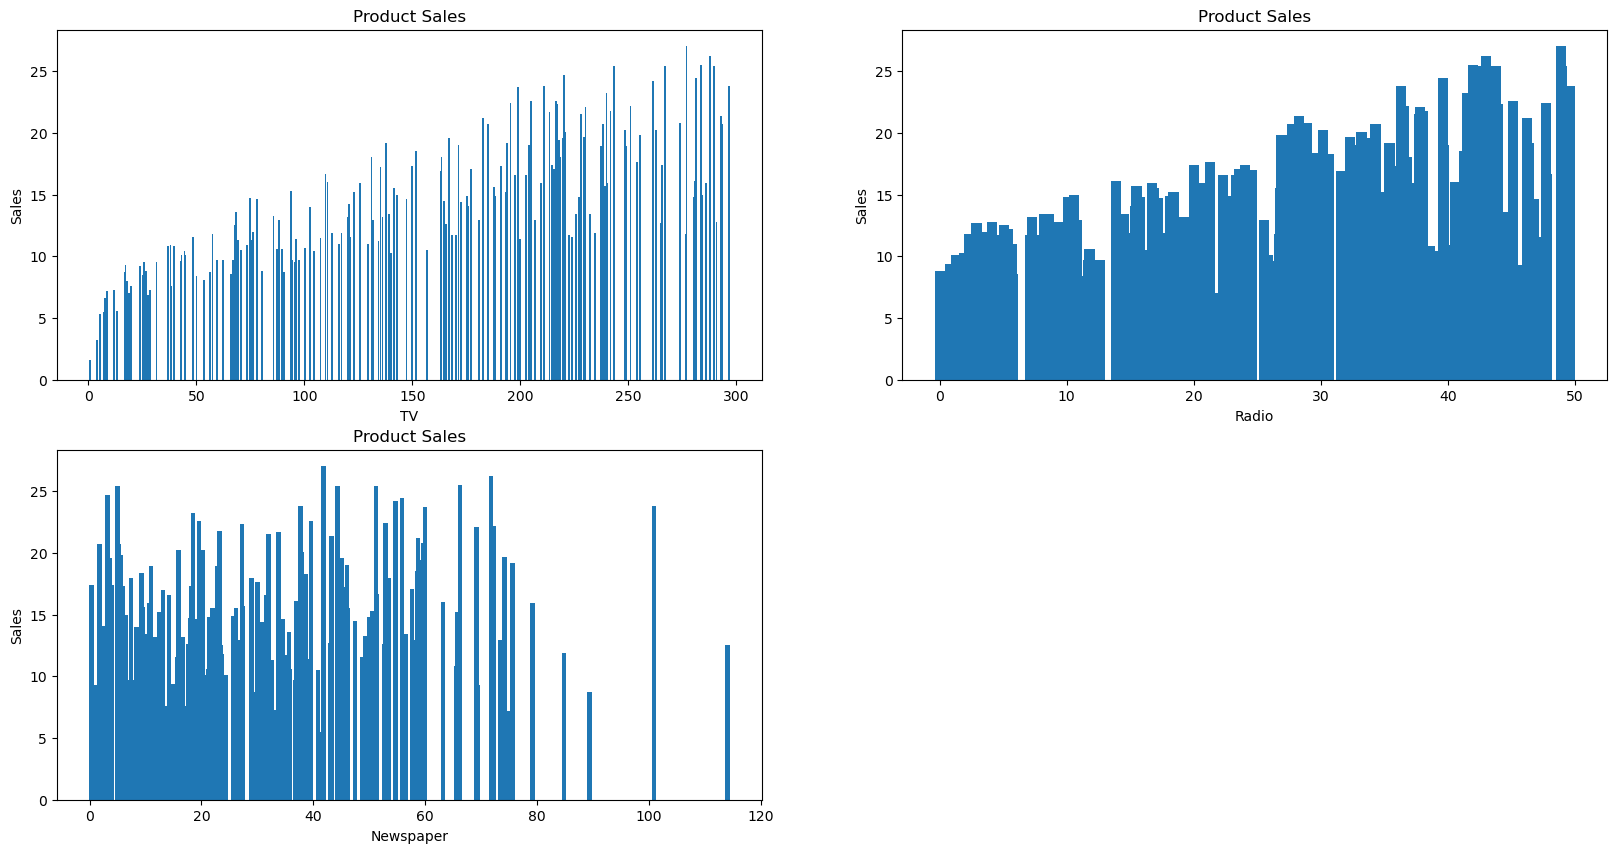

In [160]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
x=adv.TV
y=adv.Sales
plt.title("Product Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.bar(x,y)
plt.subplot(2,2,2)
x1=adv.Radio
y=adv.Sales
plt.title("Product Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.bar(x1,y)
plt.subplot(2,2,3)
x2=adv.Newspaper
y=adv.Sales
plt.title("Product Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.bar(x2,y)


<Axes: xlabel='Newspaper', ylabel='Sales'>

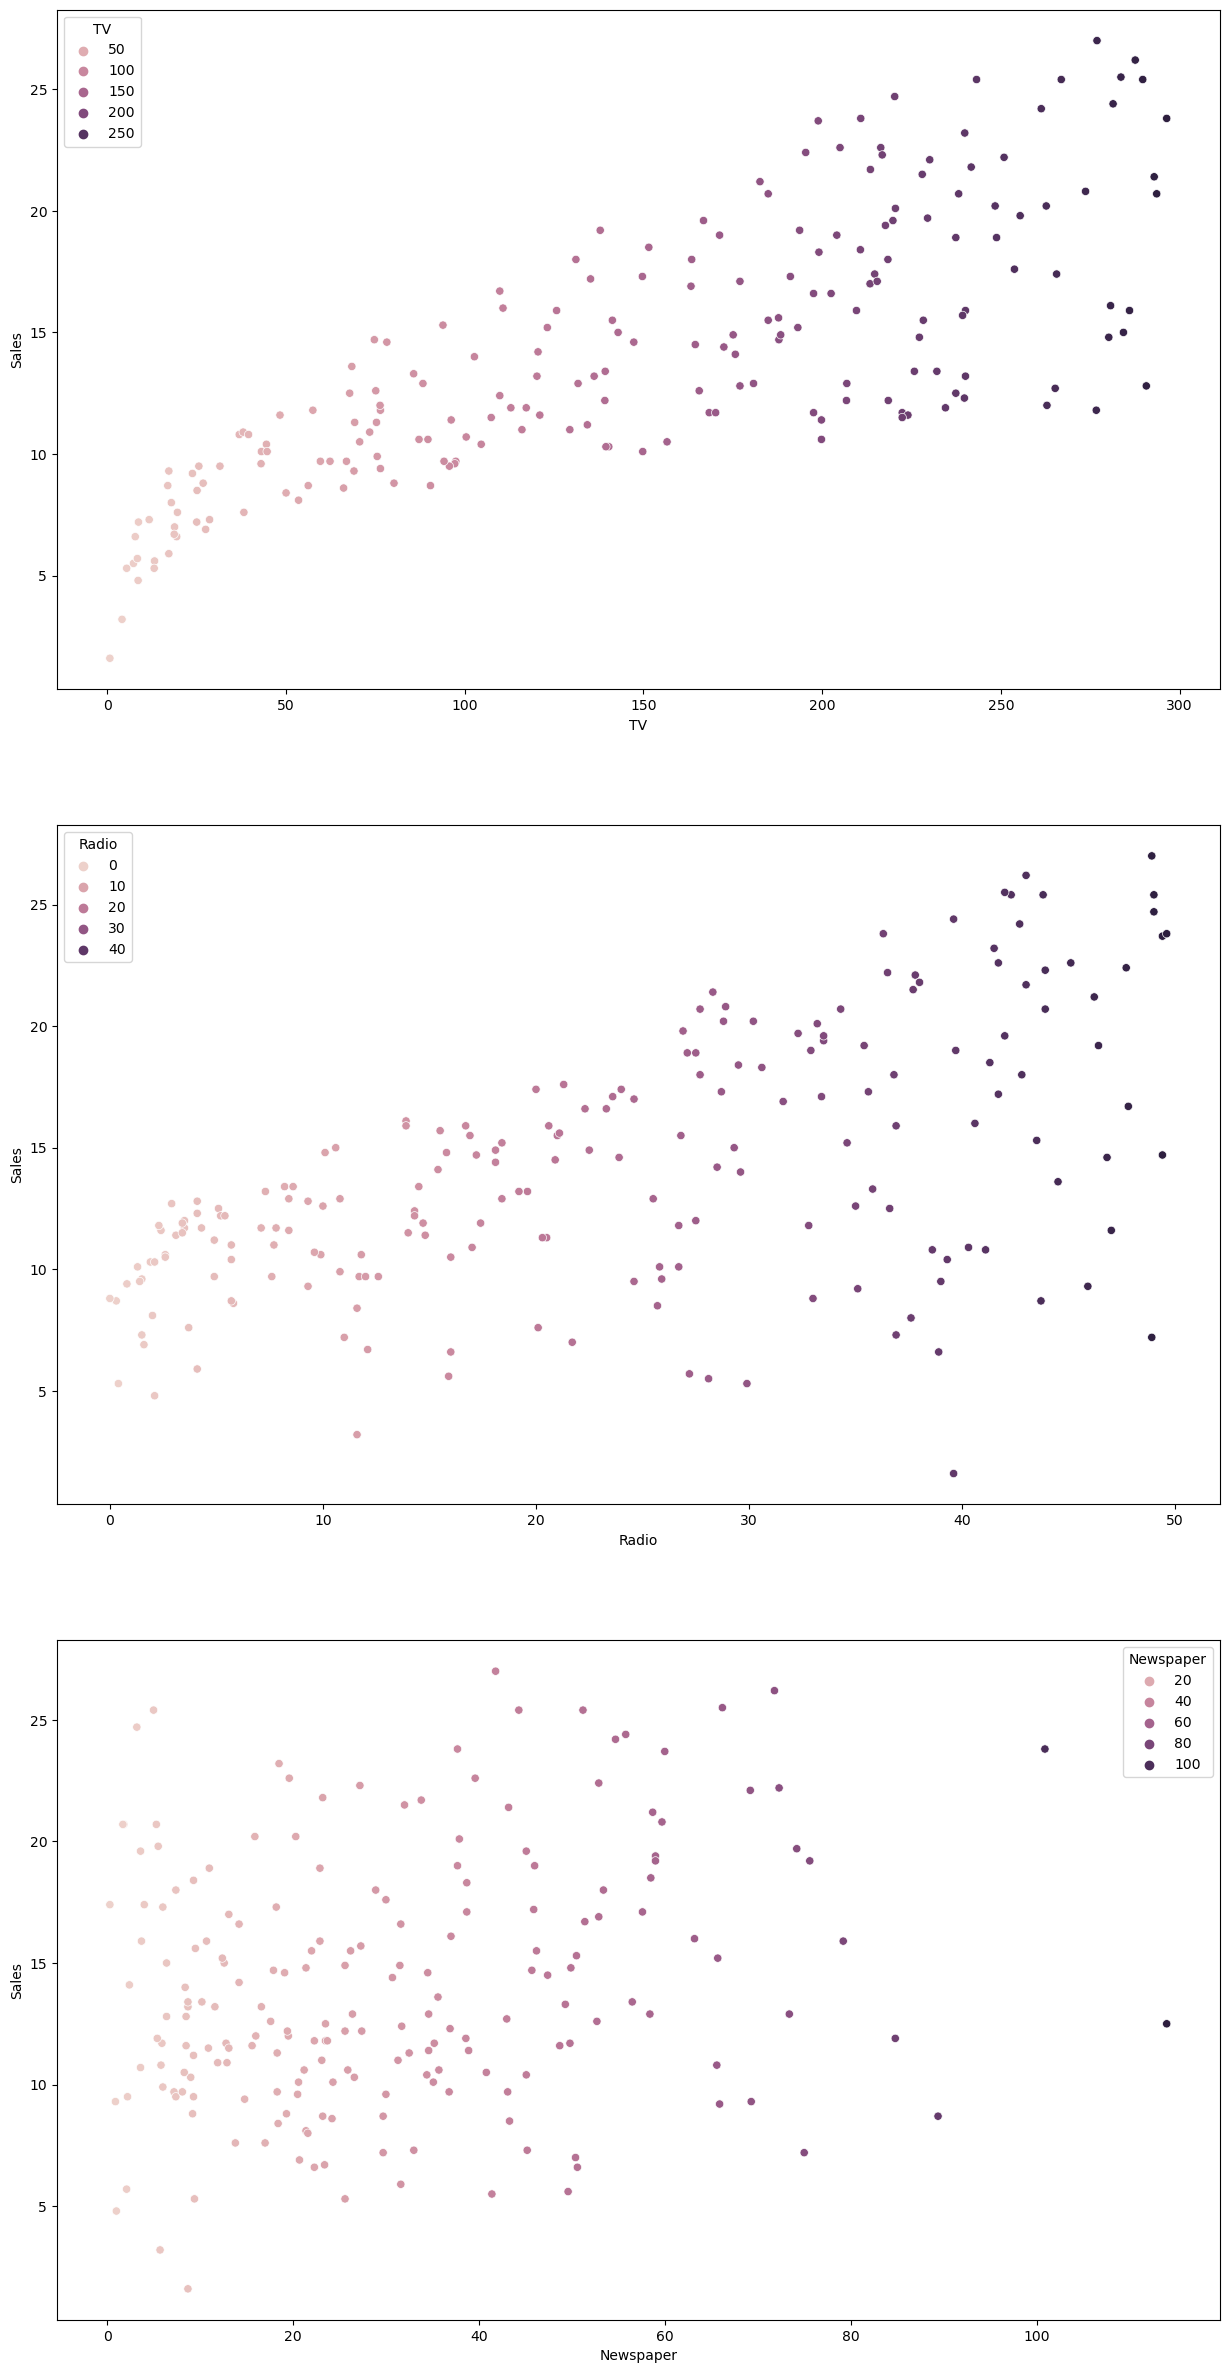

In [125]:
plt.figure(figsize=(15,30))
plt.subplot(3,1,1)
sns.scatterplot(x=adv["TV"],y=adv["Sales"],hue="TV",data=adv)
plt.subplot(3,1,2)
sns.scatterplot(x=adv["Radio"],y=adv["Sales"],hue="Radio",data=adv)
plt.subplot(3,1,3)
sns.scatterplot(x=adv["Newspaper"],y=adv["Sales"],hue="Newspaper",data=adv)

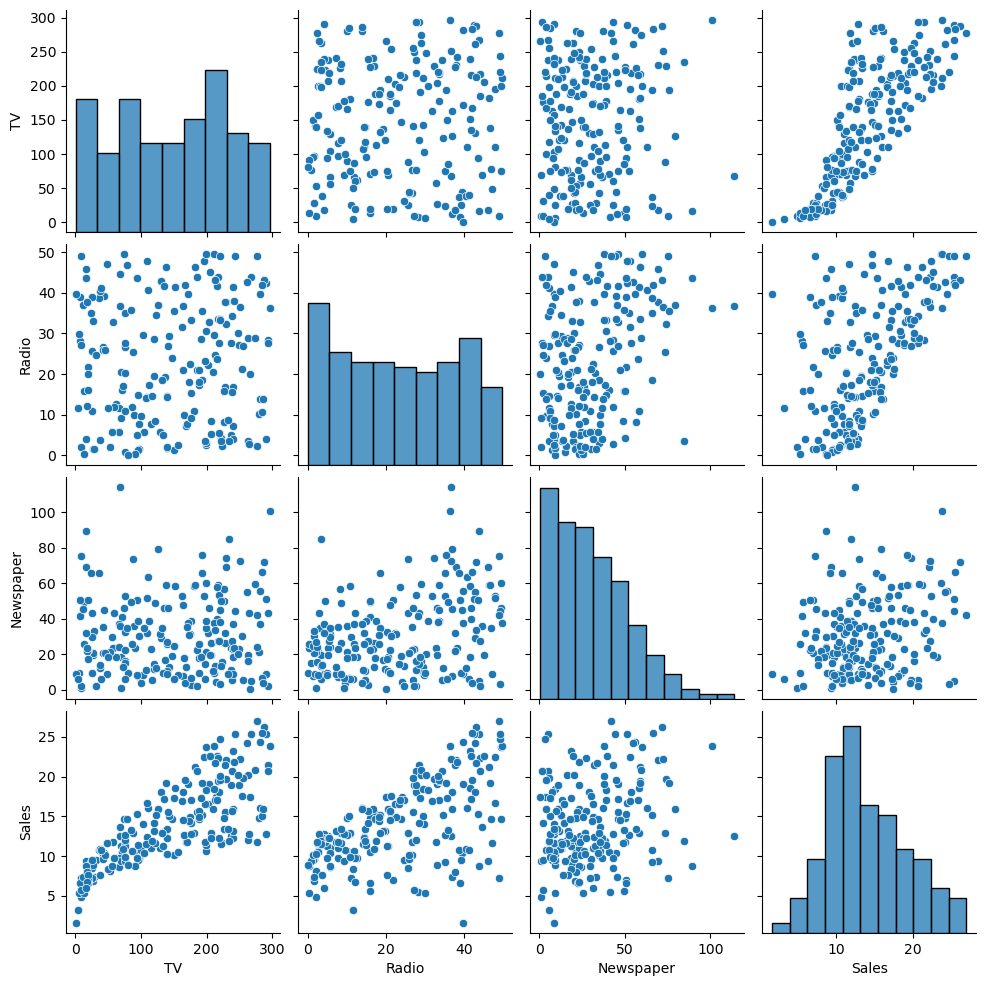

In [149]:
ad=adv.drop(columns=["Unnamed: 0"])
sns.pairplot(ad)

<Axes: ylabel='Sales'>

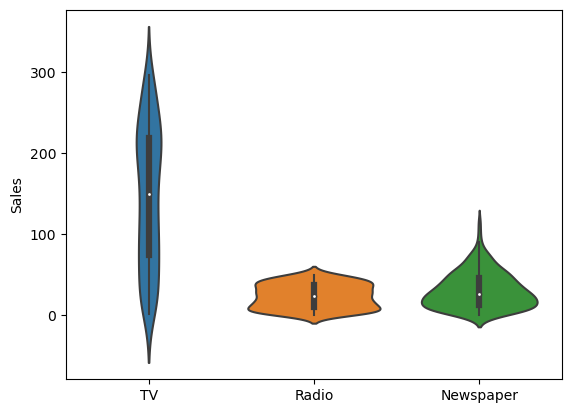

In [158]:
a=ad.drop(columns="Sales")
plt.ylabel("Sales")
sns.violinplot(a)

In [170]:
corre=ad.corr()
corre

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

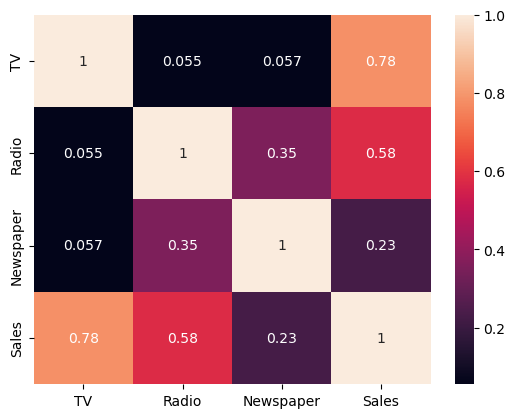

In [173]:
sns.heatmap(corre,annot=True)

<h3><b>Training Data</b></h3>

In [181]:
x=adv[["TV","Radio","Newspaper"]]
y=adv["Sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)



<h4><b>Linear Regression</b></h4>

In [186]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [190]:
print("Accuracy :",lr.score(x_test,y_test))

Accuracy : 0.8789984585041218


<BarContainer object of 60 artists>

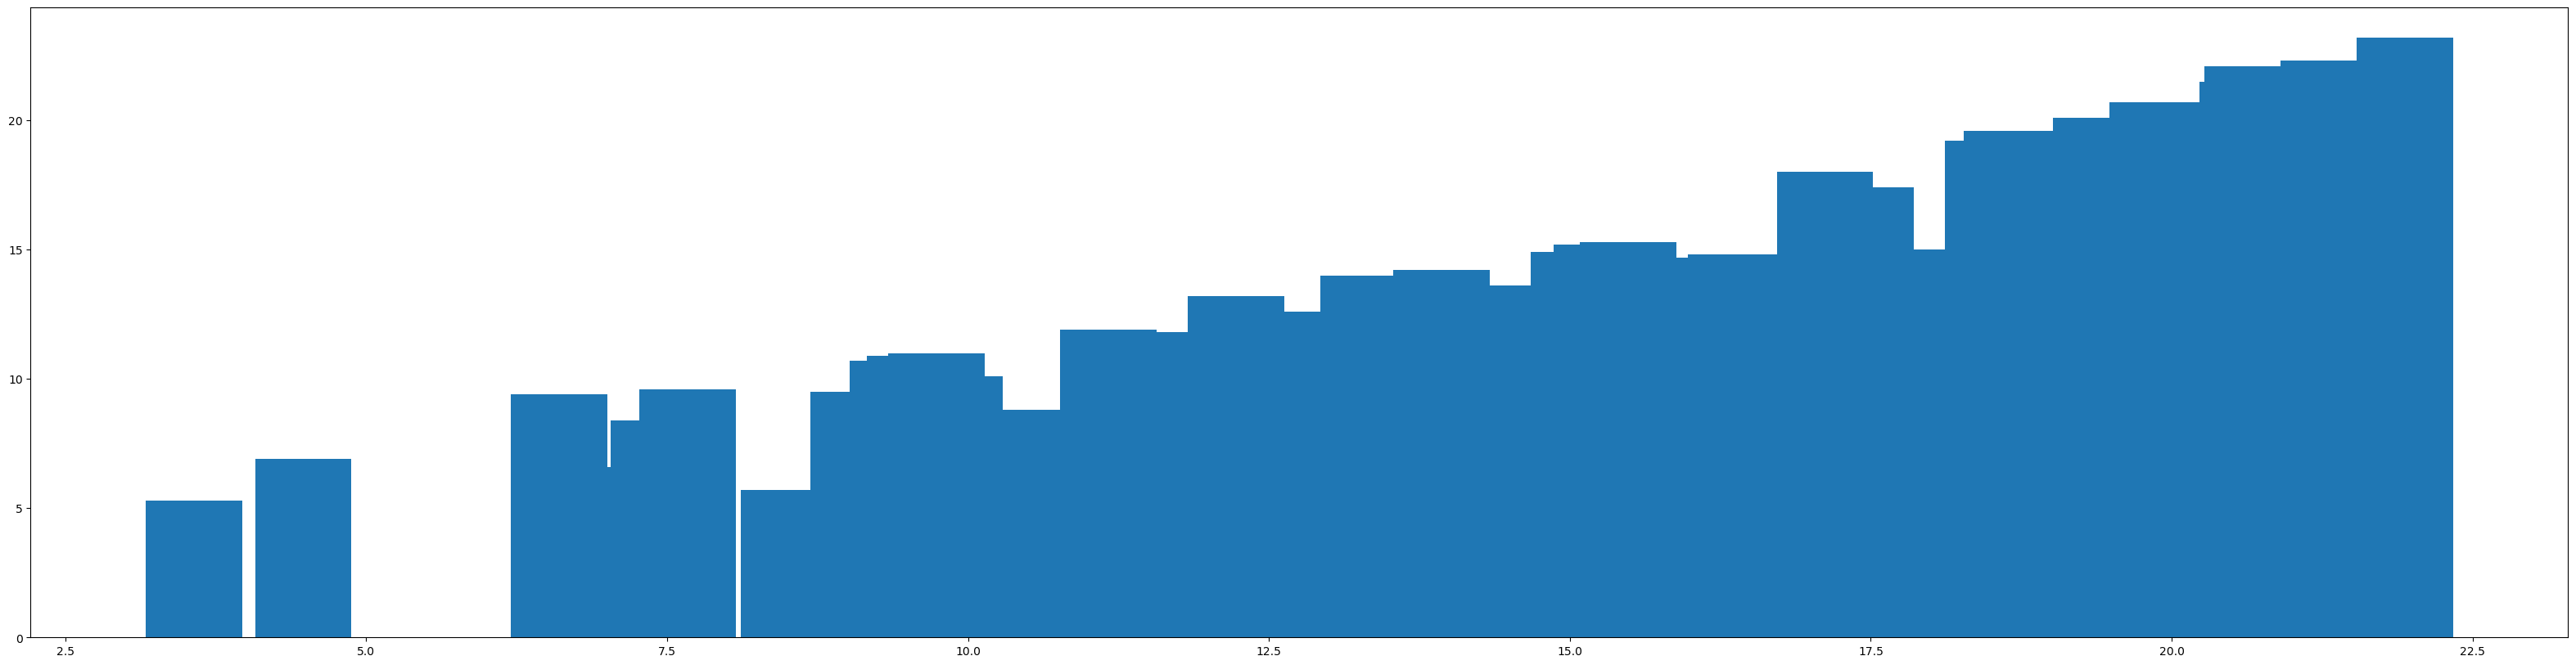

In [205]:
prediction=lr.predict(x_test)
expected=y_test
plt.figure(figsize=(40,10))
x=prediction
y=expected
plt.bar(x,y)

<h4><b>Decision Tree Regression</b></h4>

In [213]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [214]:
print("Accuracy :",dt.score(x_test,y_test))

Accuracy : 0.9238105021440692


<h4><b>Random Forest Regression</b></h4>

In [221]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [222]:
print("Accuracy :",rf.score(x_test,y_test))

Accuracy : 0.9745628050367351


<h4><b>K Nearest Neighbors Regressor</b></h4>

In [225]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
print("Accuracy :",knn.score(x_test,y_test))